#### Installing packges

In [1]:
install.packages('twitteR',repos='http://cran.us.r-project.org')
install.packages('RSQLite', repos = 'http://cran.us.r-project.org')

package 'twitteR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\RIMI\AppData\Local\Temp\RtmpeSb3km\downloaded_packages
package 'RSQLite' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\RIMI\AppData\Local\Temp\RtmpeSb3km\downloaded_packages


##### Calling libraries

In [2]:
library(twitteR)
library(RSQLite)

#### Twitter Authentication

In [3]:
api_key <- "wgv8Rsu9oTVQDJodUQDK6khI4"
api_secret <- "hhkweXXpK61mZ0blGFcNdgbB5ENnXfK2hYJngpcwi9EWrNWAoI"
 
access_token <- "771375033264513024-JZP8Bdbz7TXmm5MgFQTi21YtnUfZQL4"
 
access_token_secret <- "qIGbyUMy3vNI0LHhPfO4huLump1Jna8iy22zKzOHClEnY"
 
setup_twitter_oauth(api_key,api_secret,access_token,access_token_secret)


[1] "Using direct authentication"


##### Search String varible

In [4]:
search_str = '#superbowl'

##### Register db

In [7]:
sql_lite_file=tempfile()
register_sqlite_backend(sql_lite_file)

##### Search tweets with hashtag & store in db

In [9]:

tweets<-searchTwitter(search_str , geocode=NULL, n =100)
store_tweets_db(tweets)

[1] TRUE

##### Load data from db 

In [10]:
from_db=load_tweets_db()
length(from_db)

[1] 200

In [11]:
# removing retweets
rt_removed_tweets  <- strip_retweets(tweets,strip_manual=TRUE,strip_mt=TRUE)

In [12]:
# storing in Data frame
df<-twListToDF(rt_removed_tweets)
head(df)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
"Wow! ""@SofiAlvarezLop: En el #SuperBowl pasan muchas cosas...Escribí algunos datos para marketeros en @genwords :) https://t.co/iOmyvkvNu7""",FALSE,0,NA,2017-02-17 13:00:37,FALSE,NA,832575480293359616,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",rickyandreutti,0,FALSE,FALSE,NA,NA
Esta semana en #Resortera de @amandititita: ¿@ladygaga tuvo miedo de difundir ideales políticos en el #SuperBowl?… https://t.co/c3VyPy7lfz,FALSE,0,NA,2017-02-17 13:00:04,TRUE,NA,832575341638017024,NA,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",LaCapital_,0,FALSE,FALSE,NA,NA
.@LewisLazare are we talking Chicago #SuperBowl babies? We are!! @ChicagoBearsFAM @PNCBank https://t.co/DVtvpT1HfP,FALSE,1,NA,2017-02-17 12:57:04,FALSE,NA,832574584549494787,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",saulboscanPNC,0,FALSE,FALSE,NA,NA
#superbowl porn interruption video hardcore hospital anime https://t.co/LgSV5PdjoU,FALSE,0,NA,2017-02-17 12:56:15,FALSE,NA,832574382572711937,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Psiu_iza,0,FALSE,FALSE,NA,NA
#NFL #MVP 9 CARD LOT OF #AaronRodgers W/INSERT NO DUPES #Packers-CAL #9A https://t.co/abQoAjoj0T #SuperBowl #Forsale https://t.co/aV6zZWqEkb,FALSE,0,NA,2017-02-17 12:52:01,FALSE,NA,832573313444626432,NA,"<a href=""https://dlvrit.com/"" rel=""nofollow"">dlvr.it</a>",Myong_Wisley,0,FALSE,FALSE,NA,NA
"Lekker je weekend in met #ThisOnesForTheDonald playlist, deze had ze prima tijdens de #SuperBowl kunnen doen https://t.co/12WDk9VT4I",FALSE,0,NA,2017-02-17 12:51:17,FALSE,NA,832573132254875648,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",wackyjos,0,FALSE,FALSE,NA,NA


In [13]:
#fetching user info
user_info <- getUser('Myong_Wisley')

In [15]:
all_user_info <- paste(user_info$created,user_info$description, user_info$favoritesCount, user_info$followersCount,user_info$followRequestSent, sep = ",")

In [16]:
print(all_user_info)

[1] "2011-11-17 00:30:54,All up in this interwebs in comfortable footwear. present: MTV/VH1 Digital Production & Development. past: Sports Journalism. always: sneaker enthusiast.,0,1124,FALSE"


In [22]:
all_user_info <- paste(user_info$friendsCount, user_info$lang, user_info$location, sep = ",")

In [23]:
print(all_user_info)

[1] "0,en,Burbank, California"


In [24]:
print(user_info$lastStatus)

[1] "Unknown: #Sexy #Britney #BritneySpears Magazine Lot https://t.co/xGsDsGSDMX #Auction #Discount https://t.co/cWZRRq6EtK"


In [25]:
print(paste(user_info$name, user_info$screenName, user_info$statusesCount, user_info$verified,sep = ","))

[1] "Myong _Wisley,Myong_Wisley,490344,FALSE"


In [26]:
# fetching a user's timeline information
user_tweets <- userTimeline('rickyandreutti')
user_tweets[1:5]

[[1]]
[1] "rickyandreutti: Wow! \"@SofiAlvarezLop: En el #SuperBowl pasan muchas cosas...Escribí algunos datos para marketeros en @genwords :) https://t.co/iOmyvkvNu7\""

[[2]]
[1] "rickyandreutti: A cerrar bien la semana, gente! \nVamos arriba! \n#SomosAgentesDeCambio https://t.co/Uh3ZUfGDuW"

[[3]]
[1] "rickyandreutti: #MiDepor llegando a Maracaibo, con la disposición de llevar los tres puntos a Barquisimeto. Vamos @DeportivoLara a seguir creciendo!!!"

[[4]]
[1] "rickyandreutti: Vamos arriba, jueves! \n#SomosAgentesDeCambio https://t.co/qeyUpH6py7"

[[5]]
[1] "rickyandreutti: Un tras cámara de la campaña de @Fncancer #GotasDeAyuda con esta belleza #DiaInternacionalContraelCancerInfantil https://t.co/gEkob2jyF2"


In [27]:
tweets_large <- userTimeline('rickyandreutti', n=100)
length(tweets_large)

[1] 85

In [28]:
# finding the available trends
avail_trends = availableTrendLocations()
head(avail_trends)

name,country,woeid
Worldwide,,1
Winnipeg,Canada,2972
Ottawa,Canada,3369
Quebec,Canada,3444
Montreal,Canada,3534
Toronto,Canada,4118


In [29]:
my_tweets <- homeTimeline()

In [30]:
# fetching and diplaying my own timeline tweets
head(my_tweets)

[[1]]
[1] "ItsFoodPorn: Mac n Cheese Grilled Sandwich https://t.co/dN7FB91plb"

[[2]]
[1] "nytimes: As a crackdown on immigrants begins, Mexicos 50 consulates in the U.S. are moving quickly help them https://t.co/VCXlpyUteY"

[[3]]
[1] "CNN: \"We're just trying to manage this s***\": Republicans hang on for Donald Trump's wild ride https://t.co/9gyCiBVmJn https://t.co/pbI2m0Y5Ac"

[[4]]
[1] "enews: Viola Davis may be the odds on favorite to win an Oscar, but that's not always a good thing: https://t.co/zPuMdWX7Yw https://t.co/esERoqoZKZ"

[[5]]
[1] "planetepics: And so the fox fell in love with the hound https://t.co/AqR9WdGi3u"

[[6]]
[1] "ItsFoodPorn: Cheesy Bacon and Onion Burger https://t.co/csPD0r16GG"


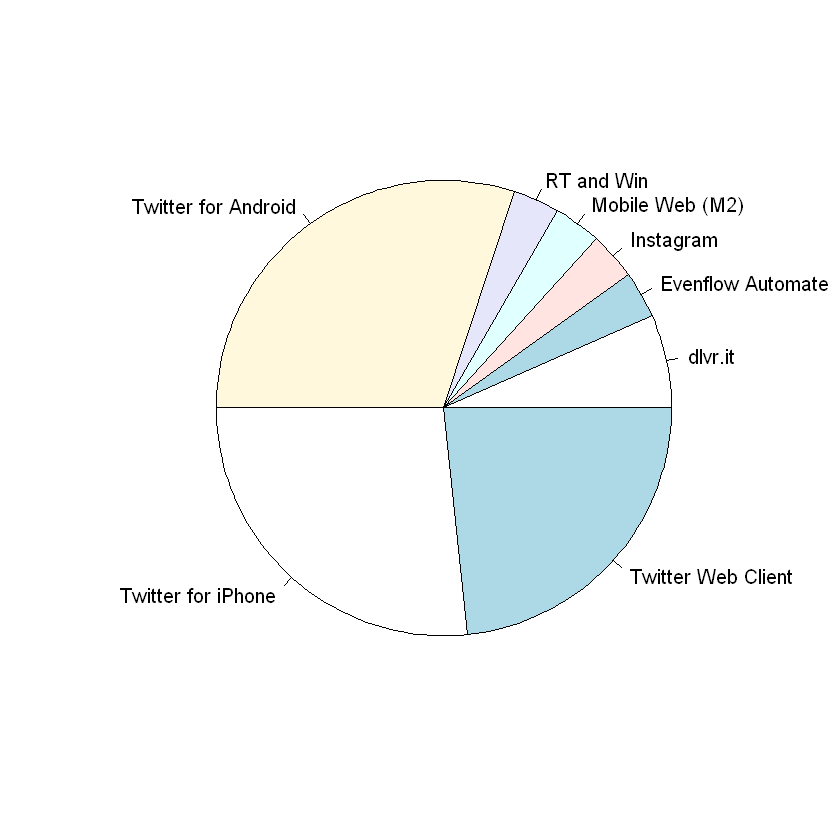

In [35]:
 r_tweets <- searchTwitter("#valentinesDay", n=30)
 sources <- sapply(r_tweets, function(x) x$getStatusSource())
 sources <- gsub("</a>", "", sources)
 sources <- strsplit(sources, ">")
 sources <- sapply(sources, function(x) ifelse(length(x) > 1, x[2], x[1]))
 source_table = table(sources)
 pie(source_table[source_table > 0])